| Name  | Surname   | Student No  | Department  |
|---|---|---|---|
| Emin  | Kartci  | S014877  | EE Engineering  |
|Ozan | Yurtsever | S015164 | EE Engineering |
|Yamaç Demirkan| Yılmaz |S018368 |Computer Science|
|Muhammed Ali |Kumaşoğlu| S018505|EE Engineering |



## If you cannot use foluim library, you can still execute the simulation
# If you do not have the libraries INSTALL THEM


In [2]:

!pip3 install foursquare
!pip3 install folium
!pip3 install geopy

     |████████████████████████████████| 94 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 1.1 MB/s eta 0:00:01


In [3]:
# To interact with user use ipywidgets library - Generate a simple GUI
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

# import pandas and json to handle data
import pandas as pd
import json 

# import manuel libraries
from Company import Company
from SimulationLibrary import SimulationEnvironment

# Mapping libraries
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
import pandas as pd
import folium
from folium import plugins



In [4]:
# DEFINE THE IPYWIDGETS

# title - start
programLabel = widgets.Label('-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=widgets.Layout(width='100%'))

# company info
companyName = widgets.Text(description="Comp. Name",value="Example LTD",layout=widgets.Layout(width="50%"))
longitude = widgets.Text(description="Longitude",value="40.730610",layout=widgets.Layout(width="30%"))
latitude = widgets.Text(description="Latitude",value="-73.935242",layout=widgets.Layout(width="30%"))
infoLabel = widgets.Label('------!  You have to define a location around NEWYORK ## Center 40.74 & -73.94 ## !------', layout=widgets.Layout(width='100%'))
# break
br1Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

# services
servicesLabel = widgets.Label('Select Services:', layout=widgets.Layout(width='100%'))
Dessertbox = widgets.Checkbox(False, description='Dessert')
Saladbox = widgets.Checkbox(False, description='Salad')
Drinkbox = widgets.Checkbox(False, description='Drink')

# break
br2Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

# product info - income statement parameters
expectedPriceLabel = widgets.Label('Expected Average Price:', layout=widgets.Layout(width='100%'))
expectedAveragePrice = widgets.IntSlider(min=10, max=100, step=1, description='(Euro): ',value=0)

expectedUnitCostLabel = widgets.Label('Expected Average Unit Cost:', layout=widgets.Layout(width='100%'))
expectedUnitCost = widgets.IntSlider(min=5, max=50, step=1, description='(Euro): ',value=0)

expectedSalesLabel = widgets.Label('Expected Sales Monthly:', layout=widgets.Layout(width='100%'))
expectedSales = widgets.IntSlider(min=5000, max=10000, step=1, description='(Euro): ',value=0)

# company expenses
fixedCostLabel = widgets.Label('Fixed Costs:', layout=widgets.Layout(width='100%'))
fixedCost = widgets.FloatText(value=10000, description='(Euro): ',color = 'blue')

taxRateLabel = widgets.Label('Tax Rate:', layout=widgets.Layout(width='100%'))
taxRate = widgets.FloatSlider(min=5, max=100, step=1, description='%: ',value=0)

# break - finish
br3Label = widgets.Label('-----------------------------------------------------------------------------------------------------', layout=widgets.Layout(width='100%'))

In [5]:
# This function gets the ipywidget checkboxes and creates a proper list 
# that will be used at the COMPANY Class.

# create a string list bu considering checkbox widgets
def set_service_list():
    
    # create an empty list
    serviceList = []
    
    # if it is checked
    if Dessertbox.value:
        # add to the list
        serviceList.append('Dessert')
    # if it is checked
    if Saladbox.value:
        # add to the list
        serviceList.append('Salad')
    # if it is checked
    if Drinkbox.value:
        # add to the list
        serviceList.append('Drink')
    
    # return the list
    return serviceList

In [6]:
# IMPORTANT 

# Before here you MUST run at leas 1 time to libraries
# and also definition of these objects



# display the widgets that I defined Here  
display(programLabel)

display(companyName)
display(longitude)
display(latitude)
display(infoLabel)
display(br2Label)


display(servicesLabel)
display(Dessertbox)
display(Saladbox)
display(Drinkbox)

display(br2Label)

display(expectedPriceLabel)
display(expectedAveragePrice)

display(expectedUnitCostLabel)
display(expectedUnitCost)

display(expectedSalesLabel)
display(expectedSales)

display(fixedCostLabel)
display(fixedCost)

display(taxRateLabel)
display(taxRate)

display(br3Label)


# HERE PLEASE TYPE YOUR COMPANY'S INFORMATION

Label(value='-------------------------->  RESTAURANT SIMULATOR PROGRAM  <--------------------------', layout=L…

Text(value='Example LTD', description='Comp. Name', layout=Layout(width='50%'))

Text(value='40.730610', description='Longitude', layout=Layout(width='30%'))

Text(value='-73.935242', description='Latitude', layout=Layout(width='30%'))

Label(value='------!  You have to define a location around NEWYORK ## Center 40.74 & -73.94 ## !------', layou…

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Select Services:', layout=Layout(width='100%'))

Checkbox(value=False, description='Dessert')

Checkbox(value=False, description='Salad')

Checkbox(value=False, description='Drink')

Label(value='-------------------------------------------------------------------------------------------------…

Label(value='Expected Average Price:', layout=Layout(width='100%'))

IntSlider(value=10, description='(Euro): ', min=10)

Label(value='Expected Average Unit Cost:', layout=Layout(width='100%'))

IntSlider(value=5, description='(Euro): ', max=50, min=5)

Label(value='Expected Sales Monthly:', layout=Layout(width='100%'))

IntSlider(value=5000, description='(Euro): ', max=10000, min=5000)

Label(value='Fixed Costs:', layout=Layout(width='100%'))

FloatText(value=10000.0, description='(Euro): ')

Label(value='Tax Rate:', layout=Layout(width='100%'))

FloatSlider(value=5.0, description='%: ', min=5.0, step=1.0)

Label(value='-------------------------------------------------------------------------------------------------…

In [7]:
# Create the environment and the company
SimEnv = SimulationEnvironment()

# if the location input is too far away ask a new location 
distanceFromCenter = SimEnv.calculate_distance_lon_lat(float(longitude.value),float(latitude.value),40.730610,-73.935242)

# if location is greater then 10000 KM
if distanceFromCenter > 10000:
    # inform the user
    print("Check Your Location:\nLon: {}\nLat: {}\nDistance from center: {}\nSelect it again!! Otherwise your location will be considered as center!!".format(longitude.value,latitude.value,distanceFromCenter))
    # take the center as location 40.74 & -73.94
    company = Company(companyName.value,40.74,-73.94,set_service_list(),expectedAveragePrice.value,expectedUnitCost.value,expectedSales.value,fixedCost.value,taxRate.value)
else:
    # create a company object
    company = Company(companyName.value,longitude.value,latitude.value,set_service_list(),expectedAveragePrice.value,expectedUnitCost.value,expectedSales.value,fixedCost.value,taxRate.value)
    # print income statement



In [8]:
# Describe the company
company.print_company_description()

# save the company properties as txt file
# company.save_company_description_to()



            Company Name: A-MEAN LTD

            Location:
                - Longitude : 40.730610° N
                - Latitude  : -73.935242° E

            Services:
            
            1 - Dessert
			2 - Salad
			
            
            Average Price      : 56
            Average Unit Cost  : 17

            Sales Volume       : 7839

            Fixed Cost         : 135663.0

            Tax Rate           : 0.18


        


In [9]:
# Show the income statement of the company
company.print_income_statement()

# Save income statement as txt
#company.save_income_statement()



                    ==========  A-MEAN LTD's MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : 56
                   | Unit Cost     : 17
                   +------------------
                   | Contribution Margin : 39
                   | Sales Volume        : 7839
                   | Revenue             : 438984 (Monthly)
                   +------------------
                   | Cost of Goods Sold  : 133263 (Monthly)
                   | Total Fixed Cost    : 135663.0 (Monthly)
                   | Total Cost          : 268926.0
                   +------------------
                   | Gross Margin        : 305721
                   | Taxes               : 55029.78
                   +------------------
                   | NET INCOME          : 250691.22
                   +------------------------------------------------------


        


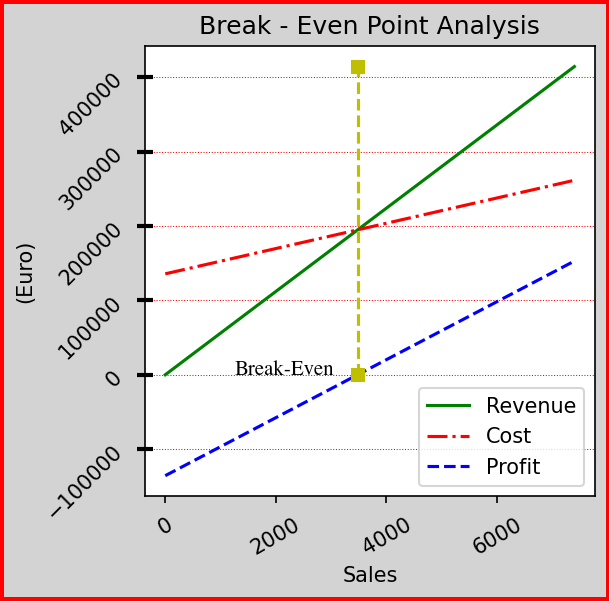

In [10]:
# plot break-even analysis
company.plot_break_even_point()

In [13]:
# SIMULATION EXECUTIONS

# define constants
tax_rate = 20

# simulation environment is alreadt created as SimEnv but redefine it
SimEnv = SimulationEnvironment(customerCount=10000)



The contribution margin is not a positive number !!
 Contribution Margin : 0


In [19]:
# You can save the simulation summary as txt file
SimEnv.report_simulation_summary(willPrint = True)

# THIS FILE WILL BE USED AT MAP FILE !!
# IMPORTANT



Company: Main Company 	PROFIT: 12545.44 	Avg Price: 20.85	 Avg Cost: 10.47	 Contribution Margin: 10.38	 Sales Vol: 1499 



Company: Allegro Coffee Company 	PROFIT: 112424.00 	Avg Price: 9.95	 Avg Cost: 4.93	 Contribution Margin: 5.01	 Sales Vol: 840 



Company: Lower East Side Coffee Shop 	PROFIT: 108240.00 	Avg Price: 13.78	 Avg Cost: 6.79	 Contribution Margin: 6.99	 Sales Vol: 843 



Company: Coffee Project New York 	PROFIT: 94790.40 	Avg Price: 14.73	 Avg Cost: 7.33	 Contribution Margin: 7.40	 Sales Vol: 901 



Company: Irving Farm Coffee Roasters 	PROFIT: 32940.80 	Avg Price: 9.95	 Avg Cost: 5.08	 Contribution Margin: 4.87	 Sales Vol: 857 


Simulation Summary file submitted successfully!!


In [22]:
SimEnv.save_competitor_income_statements(willPrint = True)

Allegro Coffee Company income statement is successfully saved!


                    ==========  Allegro Coffee Company's MONTHLY INCOME STATEMENT  ==========
                   +------------------------------------------------------
                   | Unit Price    : 9.543922984356197
                   | Unit Cost     : 4.7647412755716
                   +------------------
                   | Contribution Margin : 4.779181708784597
                   | Sales Volume        : 831
                   | Revenue             : 184510 (Monthly)
                   +------------------
                   | Cost of Goods Sold  : 147608 (Monthly)
                   | Total Fixed Cost    : 276203 (Monthly)
                   | Total Cost          : 423811
                   +------------------
                   | Gross Margin        : 36902
                   | Taxes               : 7380.400000000001
                   +------------------
                   | NET INCOME          : 29521.6
   